In [9]:
# import relevant libraries 
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, logistic
import seaborn as sns

# set path to figures directory 
wd = os.getcwd()
img_dir = os.path.join(wd, 'Figures')
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# set style for plots
sns.set_style("whitegrid", {'grid.linewidth': 0.5})

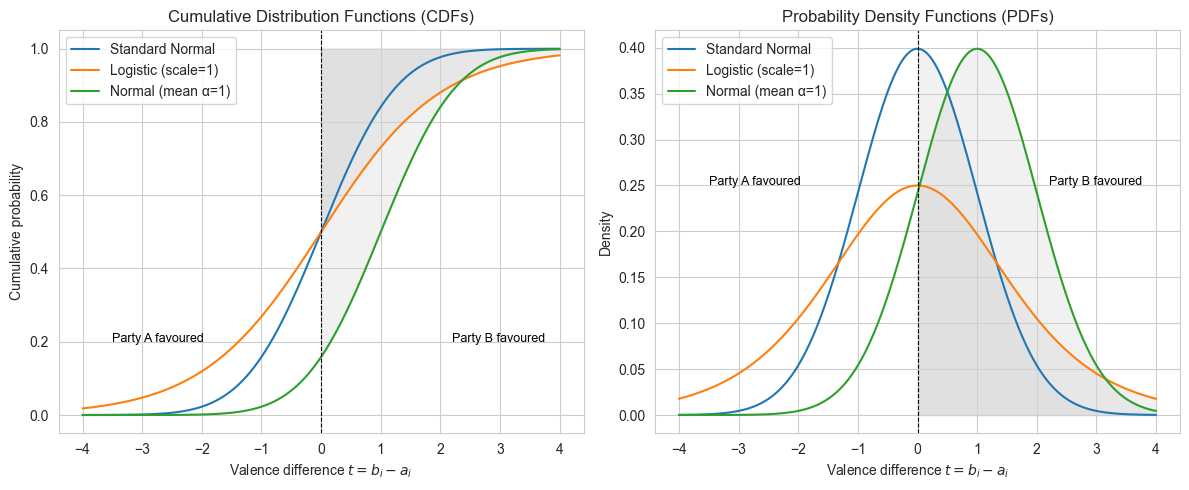

In [12]:
# Set up x-axis range
x = np.linspace(-4, 4, 500)

# Define parameters for three types of symmetric, unimodal distributions
distributions = {
    "Standard Normal": norm(loc=0, scale=1),
    "Logistic (scale=1)": logistic(loc=0, scale=1),
    "Normal (mean α=1)": norm(loc=1, scale=1)
}

# Create figure with two panels: switch order (CDF left, PDF right)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Define shaded region where t > 0 (Party A favoured in valence)
shade_x = x[x > 0]
shade_color = 'lightgrey'

# Panel 1: CDFs (now on the left)
for label, dist in distributions.items():
    axs[0].plot(x, dist.cdf(x), label=label)
    axs[0].fill_between(shade_x, dist.cdf(shade_x), 1, color=shade_color, alpha=0.3)
axs[0].set_title("Cumulative Distribution Functions (CDFs)")
axs[0].set_xlabel("Valence difference $t = b_i - a_i$")
axs[0].set_ylabel("Cumulative probability")
axs[0].legend()
axs[0].axvline(0, color='black', linestyle='--', linewidth=0.8)
axs[0].text(2.2, 0.2, "Party B favoured", fontsize=9, color='black')
axs[0].text(-3.5, 0.2, "Party A favoured", fontsize=9, color='black')

# Panel 2: PDFs (now on the right)
for label, dist in distributions.items():
    axs[1].plot(x, dist.pdf(x), label=label)
    axs[1].fill_between(shade_x, dist.pdf(shade_x), color=shade_color, alpha=0.3)
axs[1].set_title("Probability Density Functions (PDFs)")
axs[1].set_xlabel("Valence difference $t = b_i - a_i$")
axs[1].set_ylabel("Density")
axs[1].legend()
axs[1].axvline(0, color='black', linestyle='--', linewidth=0.8)
axs[1].text(2.2, 0.25, "Party B favoured", fontsize=9, color='black')
axs[1].text(-3.5, 0.25, "Party A favoured", fontsize=9, color='black')

plt.tight_layout()
# Save the figure
plt.savefig(os.path.join(img_dir, 'lb97_distributions_cdf_pdf.png'), dpi=300)
plt.show()